# Practice with Distributions & Hypothesis Testing

Alright, millenials - your love for avocados is legendary. So let's grab some data on avocado prices by region and use them to practice statistics!

<img src="images/avocado.jpeg" alt="Avocado meme: You can't please everyone, you're not an avocado" width=300>

In [14]:
# Basic imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Note - you may want to import more libraries to answer the below questions!

## The Data

Average avocado prices are given in dollars:

In [15]:
# Load the sample data from the file named 'avocado' in the data folder
avocado = pd.read_csv('data/avocado.csv')
avocado.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [16]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


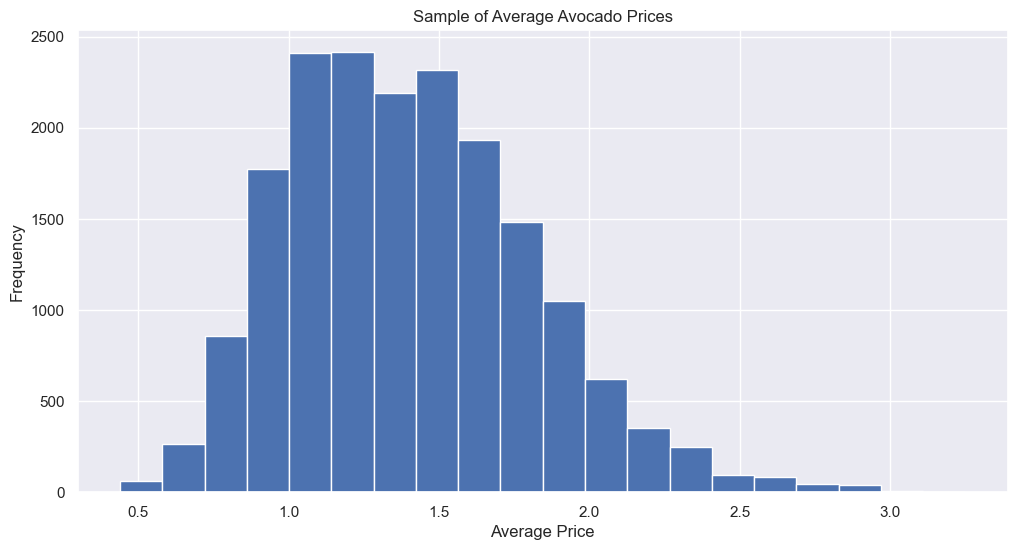

In [17]:
# Run this cell without changes

# Plot a histogram
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title('Sample of Average Avocado Prices')
ax.set_xlabel('Average Price')
ax.set_ylabel('Frequency')
ax.hist(avocado['AveragePrice'], bins=20)
plt.show()

In [18]:
# Run this cell without changes
avocado[['AveragePrice']].describe()

,AveragePrice
count,18249.000000
mean,1.405978
std,0.402677
min,0.440000
25%,1.100000
50%,1.370000
75%,1.660000
max,3.250000


## Part 1

### Calculate a z-Score

What is the z-score for an avocado with a price of **.55 cents**

In [19]:
avocado[['AveragePrice']] 

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
18244,1.63
18245,1.71
18246,1.87
18247,1.93


In [20]:
std = np.std(avocado[['AveragePrice']], axis=0) 
mu = np.mean(avocado[['AveragePrice']])
x = .55

z_score55 = (x - mu) / std
z_score55 = float(z_score55.iloc[0])
z_score55

-2.1257802367826413

In [21]:
def z_score(series, price):
    std = np.std(series, axis=0)
    mu = np.mean(series)
    z_score = (price - mu) / std

    return float(z_score.iloc[0])  

z_score(avocado[['AveragePrice']], .55)

-2.1257802367826413

Avocado with a price of .55 cents is 2.13 standard deviations less than the pop mean

### Use the Empirical Rule

Assuming the above distribution of avocado prices is roughly normal enough, use the empirical rule and the information above to determine about how many avocados are between **1 dollar and 1.80**

In [22]:
# Calculate z-score for 1 and 1.80 to use empirical rule

z_diff = z_score(avocado[['AveragePrice']], 1.8) - z_score(avocado[['AveragePrice']], 1) 
z_diff

1.986760612188092

In [29]:
import scipy.stats as stats
from scipy.stats import norm 

In [30]:
# Use CDF to calculate
norm.cdf(z_diff)

0.976525534312652

### Calculate a Percentile

Assuming the above distribution of avocado prices is roughly normal enough, what percent of avocados have a price less than **2 dollars**?

In [31]:
# Hint don't forget to pass your distribution parameters
z_score2 = z_score(avocado[['AveragePrice']], 2)

norm.cdf(z_score2) * 100

92.99237501669145

In [32]:
# Another way we haven't seen
stats.percentileofscore(avocado['AveragePrice'], 2)

92.25163022631378

### Calculate the Interquartile Range

Assuming the above distribution of avocado prices is roughly normal enough, what range of prices contain the **middle 50% of values**, also known as the _interquartile range_ (IQR)?

In [33]:
# Using Pandas

q75 = float(avocado[['AveragePrice']].quantile(.75))
q25 = float(avocado[['AveragePrice']].quantile(.25))
print(q25, q75)

1.1 1.66


/var/folders/px/v7992sbn36q0sd74xlm965340000gn/T/ipykernel_90224/1830120975.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  q75 = float(avocado[['AveragePrice']].quantile(.75))
/var/folders/px/v7992sbn36q0sd74xlm965340000gn/T/ipykernel_90224/1830120975.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  q25 = float(avocado[['AveragePrice']].quantile(.25))


In [34]:
# Using stats and ppf

print(stats.scoreatpercentile(avocado[['AveragePrice']], 75))
print(stats.scoreatpercentile(avocado[['AveragePrice']], 25))

1.66
1.1


In [35]:
norm.ppf()

TypeError: rv_continuous.ppf() missing 1 required positional argument: 'q'

In [36]:
# Another way using numpy we haven't seen
print(np.percentile(avocado['AveragePrice'], q=25))
print(np.percentile(avocado['AveragePrice'], q=75))

1.1
1.66


## Part 2: Hypothesis Test Practice

Okay, let's say we have two sets of regions for our avocado prices: the Northern hemisphere and the Southern hemisphere.

In [37]:
# Load the sample data from each hemisphere - two files in the data folder
northern_hem = pd.read_csv('data/northern_hemisphere.csv')
southern_hem = pd.read_csv('data/southern_hemisphere.csv')

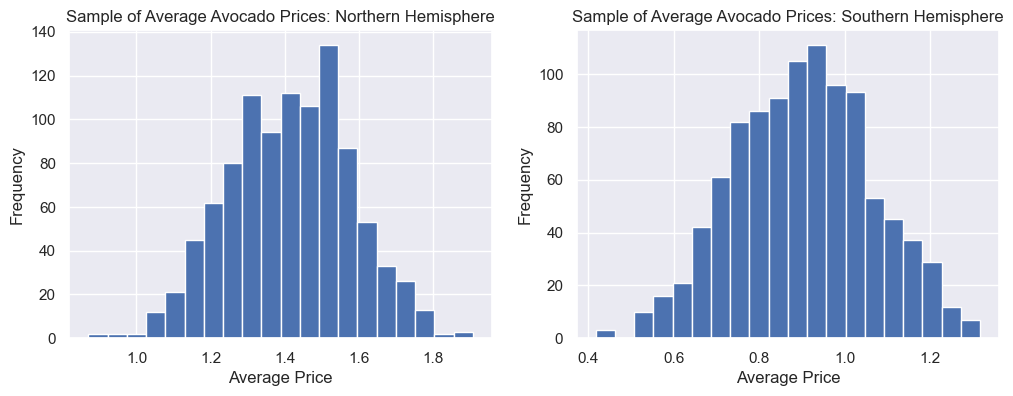

In [38]:
# Run this cell without changes

# Plot histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Average Avocado Prices: Northern Hemisphere')
ax1.set_xlabel('Average Price')
ax1.set_ylabel('Frequency')
ax1.hist(northern_hem['Average Price'], bins=20)

ax2.set_title('Sample of Average Avocado Prices: Southern Hemisphere')
ax2.set_xlabel('Average Price')
ax2.set_ylabel('Frequency')
ax2.hist(southern_hem['Average Price'], bins=20)
plt.show()

We want to know if people in the Southern hemisphere spend **a different amount** on avocados on average than those in the Northern hemisphere.

First, let's answer a few questions:

1. What **kind of test** are we doing? 

2. What are our **Null** and **Alternative** hypotheses? 
    
3. What would a **Type I** error look like in this context?

4. What would a **Type II** error look like in this context?


In [39]:
'''
1) What kind of test is this?
- This is a ttest. finding the difference of variance for two samples and if they are different.

'''

'\n1) What kind of test is this?\n- This is a ttest. finding the difference of variance for two samples and if they are different.\n\n'

In [40]:
'''
2) Null hypothesis: Variance is not different
Alternative hypothesis: Variance is not different
'''

'\n2) Null hypothesis: Variance is not different\nAlternative hypothesis: Variance is not different\n'

In [41]:
'''
3) Type I Error: false positive: reject null when its actually false


'''

'\n3) Type I Error: false positive: reject null when its actually false\n\n\n'

In [42]:
'''
4) Type II Error: false negative: don't reject the null when in reality we should have


'''

"\n4) Type II Error: false negative: don't reject the null when in reality we should have\n\n\n"

Run a statistical test on the two samples. Can you reject the null hypothesis?

Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance.

In [43]:
northern_hem

,Average Price
0,1.328146
1,1.584938
2,1.343344
3,1.346142
4,1.293508
...,...
995,1.220664
996,1.171733
997,1.098910
998,1.556830


In [44]:
southern_hem

,Average Price
0,0.958584
1,1.155443
2,0.718294
3,1.012027
4,0.719738
...,...
995,0.902403
996,1.188247
997,1.124703
998,0.831532


In [48]:
# Code here
alpha = 0.05
stats.f_oneway(southern_hem, northern_hem)

F_onewayResult(statistic=array([4906.94645744]), pvalue=array([0.]))

In [46]:
"""
Analysis here - can you reject the null hypothesis?
- Yes

"""

'\nAnalysis here - can you reject the null hypothesis?\n- Yes\n\n'

What if we only want to know if people in the Southern hemisphere spend **less** than those in the Northern hemisphere?

In [ ]:
'''
Analysis here - what would that change?


'''